<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

# Table Of Contents
#### [Practical](#part1)
- [Step 1: Load And Explore Data](#part1.1)
- [Step 2: Data Wrangling On multiple tables](#part1.2)
- [Step 3: Data Cleansing and Transformation](#part1.3)
- [Step 4: Machine Learning Model](#part1.4)

#### [Report](#part2)
- [1. Introduction with Value Based Problem Statement](#part2.1)
- [2. Probem Formulation](#part2.2)
   - [Load And Explore the data](#part2.2.1)
   - [Understand the data](#part2.2.2)
   - [Formulate a prediction problem](#part2.2.3)
- [3. Data Wrangling on multiple tables](#part2.3)
   - [Extract And Create Feautures from different tables](#part2.3.1)
   - [Concatenate and join the tables](#part2.3.2)
- [4. Data Cleansing And Transformation](#part2.4)
  - [Missing value and outliers](#part2.4.1)
  - [Categorical Data](#part2.4.2)
  - [Numerical Data](#part2.4.3)
  - [Variable Discretization](#part2.4.4)
  - [Feature Scaling](#part2.4.5)
- [5. Machine Learning Model](#part2.5)
  - [Show count of rows and columns](#part2.5.1)
  - [Build and evaluate against a naive baseline model](#part2.5.2)
- [5. Summary And Further Improvements](#part2.6)
  - [Summarize Your Findings](#part2.6.1)
  - [Explain the possible further improvements](#part2.6.2)

In [1]:
# import the packages
import math
from datetime import date
from datetime import datetime, date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.imputation import EndTailImputer
import feature_engine.imputation as mdi
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import MeanMedianImputer
from feature_engine.transformation import YeoJohnsonTransformer
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.encoding import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import EndTailImputer
from feature_engine.encoding import MeanEncoder
from feature_engine.transformation import BoxCoxTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures

## Practical <a id="part1"></a>

### Step 1: Load and Explore the Data <a id="part1.1"></a>

In [2]:
#Loading of data
df = pd.read_csv('./data/circuits_mod.csv')
df1 = pd.read_csv('./data/constructor_results_mod.csv')
df2 = pd.read_csv('./data/constructor_standings_mod.csv')
df3 = pd.read_csv('./data/constructors_mod.csv')
df4 = pd.read_csv('./data/driver_standings_mod.csv')
df5 = pd.read_csv('./data/drivers_mod.csv')
df6 = pd.read_csv('./data/lap_times_mod.csv')
df7 = pd.read_csv('./data/pit_stops_mod.csv')
df8 = pd.read_csv('./data/qualifying_mod.csv')
df9 = pd.read_csv('./data/races_mod.csv')
df10 = pd.read_csv('./data/results_mod.csv')
df11 = pd.read_csv('./data/seasons_mod.csv')
df12 = pd.read_csv('./data/status_mod.csv')
display(df)
display(df1)
display(df2)
display(df3)
display(df4)
display(df5)
display(df6)
display(df7)
display(df8)
display(df9)
display(df10)
display(df11)
display(df12)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
76,77,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.54330,39.17280,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
11945,16445,1073,214,6.0,\N
11946,16446,1073,117,0.0,\N
11947,16447,1073,210,0.0,\N
11948,16448,1073,3,0.0,\N


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
12711,27938,1074,210,0.0,6,-,0
12712,27939,1074,1,0.0,7,-,0
12713,27940,1074,131,0.0,8,-,0
12714,27941,1074,9,0.0,9,-,0


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0
...,...,...,...,...,...,...,...
33389,70776,1074,840,0,16,-,0
33390,70777,1074,852,0,17,-,0
33391,70778,1074,830,0,18,-,0
33392,70779,1074,20,0,19,-,0


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
514587,1073,847,22,15,1:30.821,90821
514588,1073,847,23,15,1:30.647,90647
514589,1073,847,24,14,1:31.577,91577
514590,1073,847,25,16,1:32.794,92794


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8823,1073,840,2,52,18:22:55,22.661,22661
8824,1073,815,3,53,18:23:09,21.385,21385
8825,1073,854,2,52,18:23:42,22.070,22070
8826,1073,852,2,53,18:24:01,21.909,21909


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9130,9171,1073,849,3,6,16,1:24.338,\N,\N
9131,9172,1073,847,3,63,17,1:24.423,\N,\N
9132,9173,1073,8,51,7,18,1:24.779,\N,\N
9133,9174,1073,854,210,47,19,1:24.906,\N,\N


,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...
1075,1092,19,22,Japanese Grand Prix,10/9/2022,5:10:00,https://en.wikipedia.org/wiki/2022_Japanese_Gr...
1076,1093,20,69,United States Grand Prix,10/23/2022,19:00:00,https://en.wikipedia.org/wiki/2022_United_Stat...
1077,1094,21,32,Mexico City Grand Prix,10/30/2022,19:00:00,https://en.wikipedia.org/wiki/2022_Mexican_Gra...
1078,1095,22,18,São Paulo Grand Prix,11/13/2022,17:00:00,https://en.wikipedia.org/wiki/2022_S%C3%A3o_Pa...


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25400,1073,815,9,11,4,15,15,15,0.0,55,\N,\N,51,2,01:26.4,219.993,5
25395,25401,1073,849,3,6,16,\N,R,16,0.0,50,\N,\N,30,15,01:29.3,212.912,3
25396,25402,1073,841,51,99,14,\N,R,17,0.0,33,\N,\N,33,16,01:29.4,212.557,6
25397,25403,1073,847,3,63,17,\N,R,18,0.0,26,\N,\N,23,19,01:30.6,209.732,6


,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...
...,...,...
68,2018,https://en.wikipedia.org/wiki/2018_Formula_One...
69,2019,https://en.wikipedia.org/wiki/2019_Formula_One...
70,2020,https://en.wikipedia.org/wiki/2020_Formula_One...
71,2021,https://en.wikipedia.org/wiki/2021_Formula_One...


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
132,135,Brake duct
133,136,Seat
134,137,Damage
135,138,Debris


In [3]:
#Correlation Matrix
df7.corr()

,raceId,driverId,stop,lap,milliseconds
raceId,1.000000,0.344111,-0.082892,-0.033751,0.183124
driverId,0.344111,1.000000,-0.035630,-0.032892,0.049989
stop,-0.082892,-0.035630,1.000000,0.593778,0.057735
lap,-0.033751,-0.032892,0.593778,1.000000,-0.081822
milliseconds,0.183124,0.049989,0.057735,-0.081822,1.000000


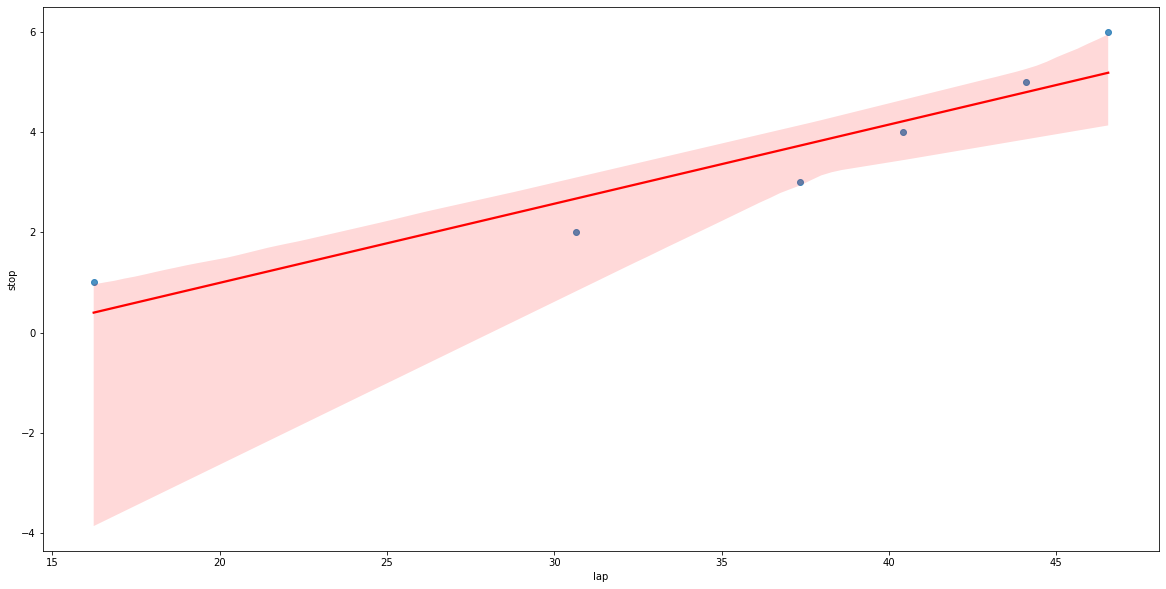

In [4]:
# REG plot for stop and lap
stop_lap = df7.groupby('stop')['lap'].mean()
plt.figure(figsize = (20, 10))
sns.regplot(x = stop_lap, y = stop_lap.index, line_kws={"color": "red"})
plt.show()

In [5]:
#Correlation Matrix
df10.corr()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
resultId,1.000000,0.963590,0.707232,0.442138,-0.016206,-0.040189,0.226067,0.104874,-0.003247
raceId,0.963590,1.000000,0.727869,0.438163,-0.020372,-0.033705,0.210197,0.098680,0.013594
driverId,0.707232,0.727869,1.000000,0.324027,0.069674,-0.002902,-0.004123,0.098606,0.022493
constructorId,0.442138,0.438163,0.324027,1.000000,0.106800,0.081306,-0.043336,0.016743,0.114089
grid,-0.016206,-0.020372,0.069674,0.106800,1.000000,0.093054,-0.366767,0.077926,-0.125543
positionOrder,-0.040189,-0.033705,-0.002902,0.081306,0.093054,1.000000,-0.357307,-0.550482,0.437200
points,0.226067,0.210197,-0.004123,-0.043336,-0.366767,-0.357307,1.000000,0.252524,-0.268724
laps,0.104874,0.098680,0.098606,0.016743,0.077926,-0.550482,0.252524,1.000000,-0.354424
statusId,-0.003247,0.013594,0.022493,0.114089,-0.125543,0.437200,-0.268724,-0.354424,1.000000


In [6]:
#Correlation Matrix
df2.corr()

,constructorStandingsId,raceId,constructorId,points,position,wins
constructorStandingsId,1.000000,0.772289,0.352283,0.224846,-0.029472,0.018107
raceId,0.772289,1.000000,0.420790,0.267422,-0.040372,0.019585
constructorId,0.352283,0.420790,1.000000,-0.051311,0.186595,-0.066604
points,0.224846,0.267422,-0.051311,1.000000,-0.444863,0.707237
position,-0.029472,-0.040372,0.186595,-0.444863,1.000000,-0.469479
wins,0.018107,0.019585,-0.066604,0.707237,-0.469479,1.000000


In [7]:
# To change the year properly to be used afterwards
for i in df9['date']:
    date = str(i)
    if '/' in date:
        dates = date.split('/')
        if int(dates[2]) > 10000:
            dates[2] = dates[2][1:]
            newdate = '/'.join(dates)
            df9["date"].replace(i, newdate, inplace = True)
            continue

df9.head()

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/2009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [8]:
#Displaying all the dataframes I am planning to use
display(df9, df3, df4, df5, df10, df12, df7, df) # dont use df 
#Merge driver standings first

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/2009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...
1075,1092,19,22,Japanese Grand Prix,10/9/2022,5:10:00,https://en.wikipedia.org/wiki/2022_Japanese_Gr...
1076,1093,20,69,United States Grand Prix,10/23/2022,19:00:00,https://en.wikipedia.org/wiki/2022_United_Stat...
1077,1094,21,32,Mexico City Grand Prix,10/30/2022,19:00:00,https://en.wikipedia.org/wiki/2022_Mexican_Gra...
1078,1095,22,18,São Paulo Grand Prix,11/13/2022,17:00:00,https://en.wikipedia.org/wiki/2022_S%C3%A3o_Pa...


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0
...,...,...,...,...,...,...,...
33389,70776,1074,840,0,16,-,0
33390,70777,1074,852,0,17,-,0
33391,70778,1074,830,0,18,-,0
33392,70779,1074,20,0,19,-,0


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25400,1073,815,9,11,4,15,15,15,0.0,55,\N,\N,51,2,01:26.4,219.993,5
25395,25401,1073,849,3,6,16,\N,R,16,0.0,50,\N,\N,30,15,01:29.3,212.912,3
25396,25402,1073,841,51,99,14,\N,R,17,0.0,33,\N,\N,33,16,01:29.4,212.557,6
25397,25403,1073,847,3,63,17,\N,R,18,0.0,26,\N,\N,23,19,01:30.6,209.732,6


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
132,135,Brake duct
133,136,Seat
134,137,Damage
135,138,Debris


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8823,1073,840,2,52,18:22:55,22.661,22661
8824,1073,815,3,53,18:23:09,21.385,21385
8825,1073,854,2,52,18:23:42,22.070,22070
8826,1073,852,2,53,18:24:01,21.909,21909


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
76,77,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.54330,39.17280,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


### Step 2: Data Wrangling on multiple tables  <a id="part1.2"></a>

In [9]:
df10 = df10.drop_duplicates(subset=['driverId'])
df_a = pd.merge(df5[['driverId', 'driverRef', 'dob', 'nationality', 'code']], df4, on = 'driverId', how = 'inner').drop_duplicates()
df_b = pd.merge(df_a, df10[['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position', 'positionText', 'points', 'laps', 'statusId']], on = 'raceId', how = 'inner').drop_duplicates()
df_c = pd.merge(df_b, df3[['constructorId', 'name', 'nationality']], on = 'constructorId', how = 'inner').drop_duplicates()
df_d = pd.merge(df_c, df12[['statusId', 'status']], on = 'statusId', how = 'inner').drop_duplicates()
df_d = df_d.drop(columns=['driverId_y', 'number'])
df_d.rename(columns = {'driverId_x':'driverId'}, inplace = True)
df_e = pd.merge(df_d, df9[['raceId', 'round', 'name', 'date', 'time']], on = 'raceId', how = 'inner').drop_duplicates()
data = pd.merge(df_e, df7[['driverId', 'stop']], on = 'driverId', how = 'inner')
data.rename(columns = {'nationality_y':'driver_nationality', 'nationality_x':'constructor_nationality'}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339265 entries, 0 to 339264
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   driverId                 339265 non-null  int64  
 1   driverRef                339265 non-null  object 
 2   dob                      339265 non-null  object 
 3   constructor_nationality  339265 non-null  object 
 4   code                     339265 non-null  object 
 5   driverStandingsId        339265 non-null  int64  
 6   raceId                   339265 non-null  int64  
 7   points_x                 338863 non-null  object 
 8   position_x               339265 non-null  int64  
 9   positionText_x           339265 non-null  object 
 10  wins                     339265 non-null  int64  
 11  resultId                 339265 non-null  int64  
 12  constructorId            339265 non-null  int64  
 13  grid                     339265 non-null  int64  
 14  posi

In [10]:
data.rename(columns = {'nationality_y':'driver_nationality', 'nationality_x':'constructor_nationality'}, inplace = True)
data.rename(columns = {'name_x':'constructor_name', 'name_y':'grandprix_name'}, inplace = True)
data.rename(columns = {'position_x':'driver_position', 'points_y':'driver_points', 'positionText_y':'Finish', 'name':'circuit_name'}, inplace = True)
data = data.drop(columns = ['position_y', 'points_x', 'time', 'driver_position', 'positionText_x','driverId', 'constructorId', 'resultId', 'driverStandingsId', 'laps', 'status', 'statusId', 'raceId'])
#Remember to remove drop columns status and driver_points

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339265 entries, 0 to 339264
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   driverRef                339265 non-null  object 
 1   dob                      339265 non-null  object 
 2   constructor_nationality  339265 non-null  object 
 3   code                     339265 non-null  object 
 4   wins                     339265 non-null  int64  
 5   grid                     339265 non-null  int64  
 6   Finish                   339265 non-null  object 
 7   driver_points            339265 non-null  float64
 8   constructor_name         339265 non-null  object 
 9   driver_nationality       339265 non-null  object 
 10  round                    339265 non-null  int64  
 11  grandprix_name           339265 non-null  object 
 12  date                     305959 non-null  object 
 13  stop                     339265 non-null  int64  
dtypes: f

In [12]:
pd. set_option('display.max_columns', None)

In [13]:
display(data)

,driverRef,dob,constructor_nationality,code,wins,grid,Finish,driver_points,constructor_name,driver_nationality,round,grandprix_name,date,stop
0,hamilton,1985-01-07,British,HAM,1,1,1,10.0,McLaren,British,1,Australian Grand Prix,3/16/2008,1
1,hamilton,1985-01-07,British,HAM,1,1,1,10.0,McLaren,British,1,Australian Grand Prix,3/16/2008,2
2,hamilton,1985-01-07,British,HAM,1,1,1,10.0,McLaren,British,1,Australian Grand Prix,3/16/2008,1
3,hamilton,1985-01-07,British,HAM,1,1,1,10.0,McLaren,British,1,Australian Grand Prix,3/16/2008,2
4,hamilton,1985-01-07,British,HAM,1,1,1,10.0,McLaren,British,1,Australian Grand Prix,3/16/2008,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339260,rossi,1991-09-25,American,RSS,0,20,14,0.0,Manor Marussia,British,13,Singapore Grand Prix,9/20/2015,3
339261,rossi,1991-09-25,American,RSS,0,20,14,0.0,Manor Marussia,British,13,Singapore Grand Prix,9/20/2015,1
339262,rossi,1991-09-25,American,RSS,0,20,14,0.0,Manor Marussia,British,13,Singapore Grand Prix,9/20/2015,2
339263,rossi,1991-09-25,American,RSS,0,20,14,0.0,Manor Marussia,British,13,Singapore Grand Prix,9/20/2015,1


In [14]:
data['Finish'].unique()

array(['1', '5', '2', '3', '4', '6', 'R', '7', '8', 'D', '9', '11', '16',
       '17', '15', '10', '13', '12', '14', '18', '19', 'W', 'N', 'F'],
      dtype=object)

In [15]:
# data['laps'].describe()

In [16]:
#Extracting year month quarter etc from date columns
data['date'] = pd.to_datetime(data['date'])
data['GrandPrix_year'] = data['date'].dt.year
data['GrandPrix_month'] = data['date'].dt.month
data['GrandPrix_Quarter'] = data['date'].dt.quarter
data['dob'] = pd.to_datetime(data['dob'])
data['year_of_birth'] = data['dob'].dt.year
data = data.drop(columns = ['date', 'dob'])

In [17]:
#Creating new feature in dataframe called driver age
data['driver_age'] = 2022 - data['year_of_birth']

In [18]:
#Replacing values in position text column to show whether driver finished
replacement_map = {'Finish':{'W':0, 'N':0, 'F':0, 'D':0, 'R':0, '1':1, '2':1, '3':1, '3':1, '4':1, '5':1, '6':1, '7':1, '8':1, '9':1, '10':1, '11':1, '12':1, '13':1, '14':1, '15':1, '16':1, '17':1, '18':1, '19':1}}
data.replace(replacement_map, inplace = True)
data['Finish'].unique()

array([1, 0], dtype=int64)

In [19]:
data.corr()

,wins,grid,Finish,driver_points,round,stop,GrandPrix_year,GrandPrix_month,GrandPrix_Quarter,year_of_birth,driver_age
wins,1.000000,0.055161,0.024437,-0.049580,0.350130,0.002757,-0.049852,0.335156,0.330885,-0.094922,0.094922
grid,0.055161,1.000000,-0.213958,-0.519707,0.160098,-0.000554,0.113214,0.181764,0.172170,0.055260,-0.055260
Finish,0.024437,-0.213958,1.000000,0.213687,0.193417,-0.010143,0.296760,0.224036,0.228573,0.186350,-0.186350
driver_points,-0.049580,-0.519707,0.213687,1.000000,-0.147781,0.000701,-0.056214,-0.164973,-0.166555,0.011628,-0.011628
round,0.350130,0.160098,0.193417,-0.147781,1.000000,-0.001960,0.103498,0.973633,0.959885,0.052347,-0.052347
stop,0.002757,-0.000554,-0.010143,0.000701,-0.001960,1.000000,-0.035104,-0.005708,-0.004529,-0.042540,0.042540
GrandPrix_year,-0.049852,0.113214,0.296760,-0.056214,0.103498,-0.035104,1.000000,0.161245,0.145409,0.693292,-0.693292
GrandPrix_month,0.335156,0.181764,0.224036,-0.164973,0.973633,-0.005708,0.161245,1.000000,0.984986,0.117700,-0.117700
GrandPrix_Quarter,0.330885,0.172170,0.228573,-0.166555,0.959885,-0.004529,0.145409,0.984986,1.000000,0.106574,-0.106574
year_of_birth,-0.094922,0.055260,0.186350,0.011628,0.052347,-0.042540,0.693292,0.117700,0.106574,1.000000,-1.000000


### Step 3: Data Cleansing and Transformation  <a id="part1.3"></a>

In [20]:
#Transforming numerical values
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

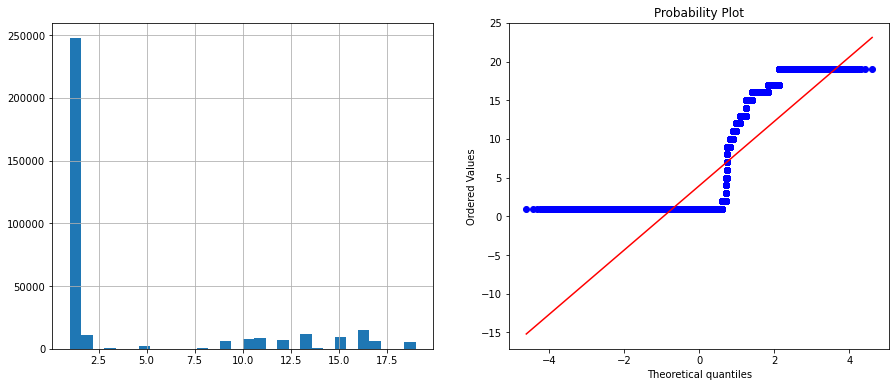

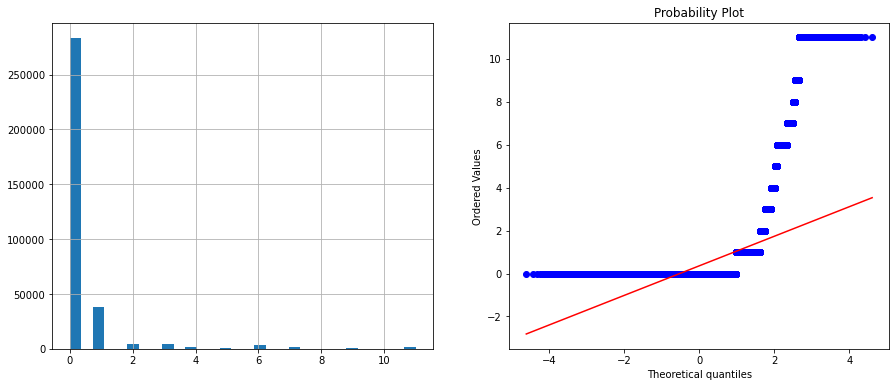

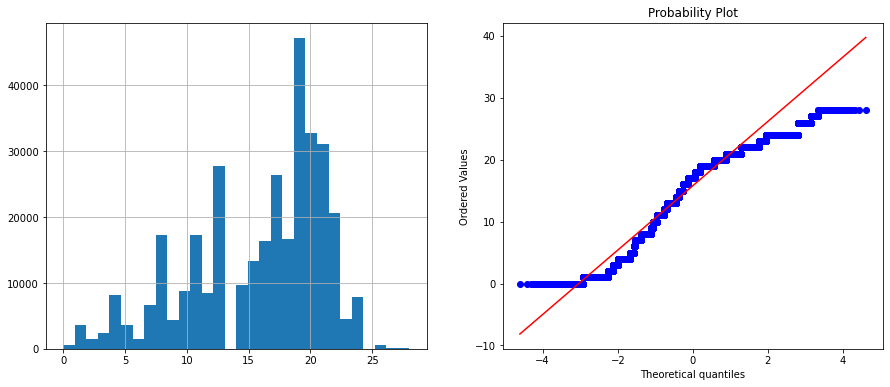

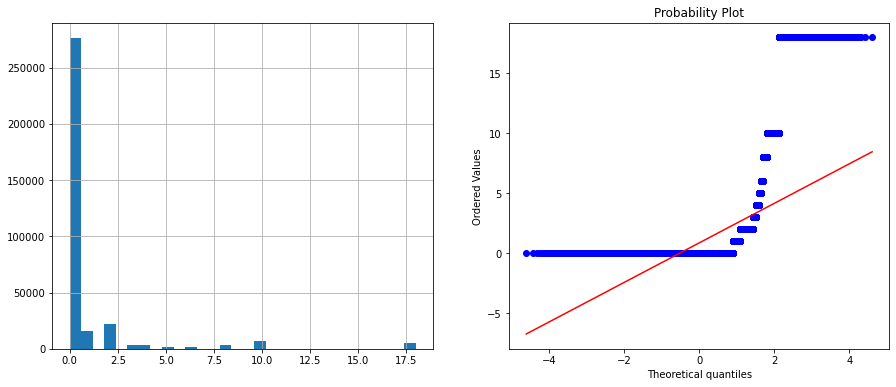

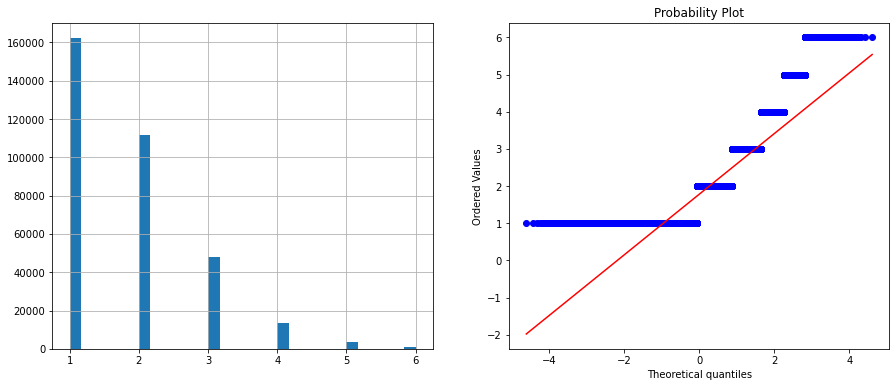

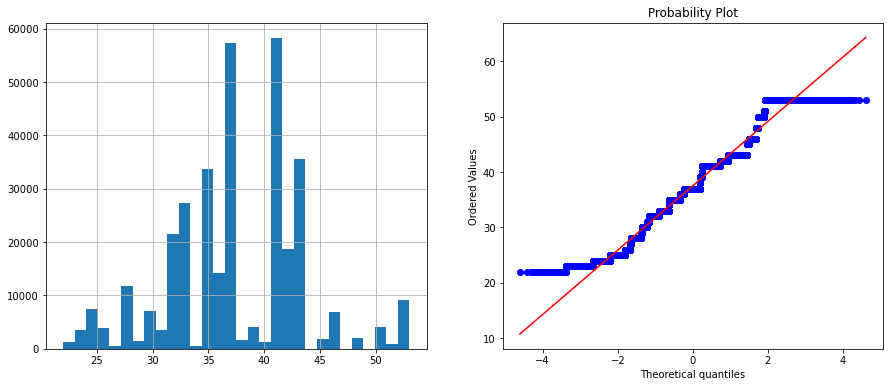

In [21]:
diagnostic_plots(data, 'round')
diagnostic_plots(data, 'wins')
diagnostic_plots(data, 'grid')
diagnostic_plots(data, 'driver_points')
diagnostic_plots(data, 'stop')
diagnostic_plots(data, 'driver_age')

In [22]:
# yjt = YeoJohnsonTransformer(variables = ['round', 'wins', 'grid', 'driver_points', 'stop', 'driver_age']) 
# yjt.fit(data)

In [23]:
# data = yjt.transform(data)

In [24]:
# diagnostic_plots(data, 'round')
# diagnostic_plots(data, 'wins')
# diagnostic_plots(data, 'grid')
# diagnostic_plots(data, 'driver_points')
# diagnostic_plots(data, 'stop')
# diagnostic_plots(data, 'driver_age')

In [25]:
#Trying power transformation
et = PowerTransformer(variables = ['round', 'wins', 'grid', 'driver_points', 'stop', 'driver_age'], exp=0.3)

# fit transformer to data
et.fit(data)

PowerTransformer(exp=0.3,
                 variables=['round', 'wins', 'grid', 'driver_points', 'stop',
                            'driver_age'])

In [26]:
data = et.transform(data)

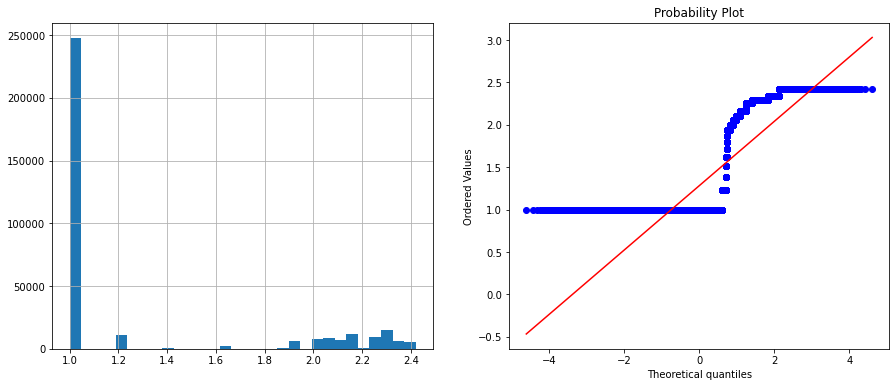

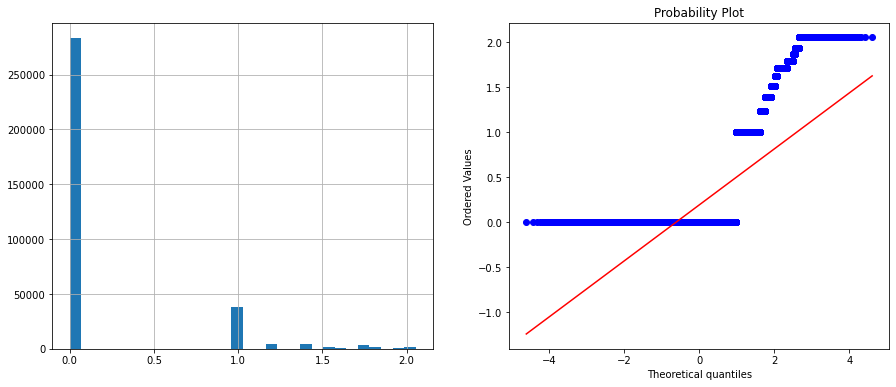

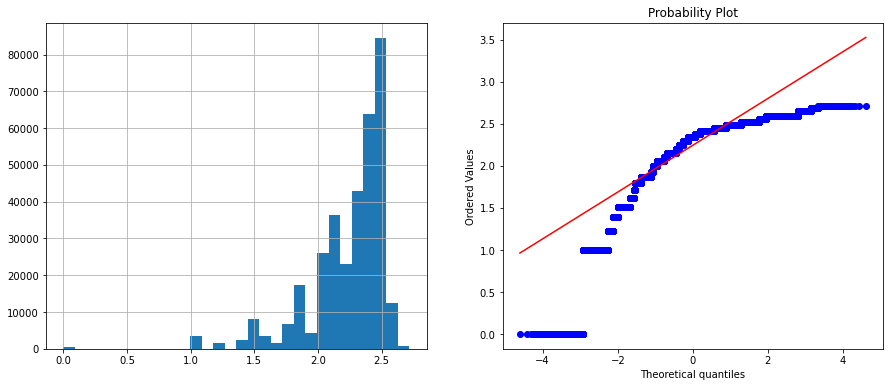

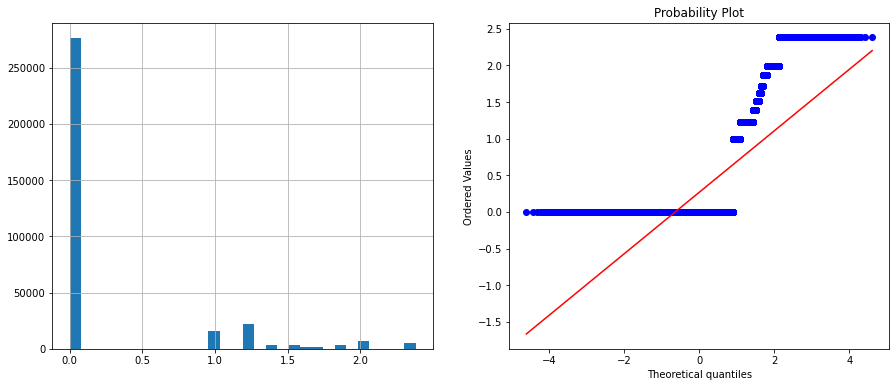

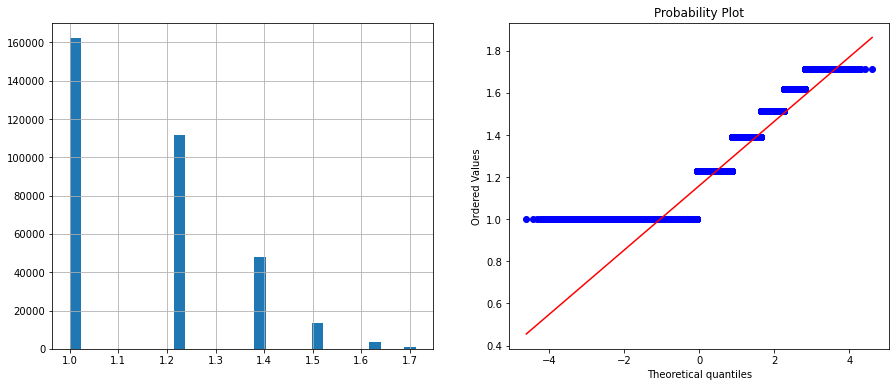

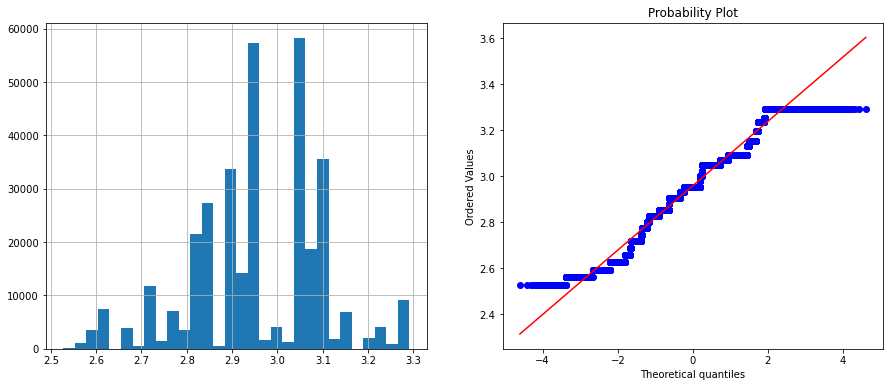

In [27]:
diagnostic_plots(data, 'round')
diagnostic_plots(data, 'wins')
diagnostic_plots(data, 'grid')
diagnostic_plots(data, 'driver_points')
diagnostic_plots(data, 'stop')
diagnostic_plots(data, 'driver_age')

In [28]:
#Trying box cox transformation
# bct = BoxCoxTransformer(variables = ['round'])
# bct.fit(data)
# data = bct.transform(data)

In [29]:
# diagnostic_plots(data, 'round')

In [30]:
#find categorical variables and the percentage of missing values
cat_cols = [c for c in data.columns if data[c].dtypes=='O']
data[cat_cols].isnull().mean().sort_values()

driverRef                  0.0
constructor_nationality    0.0
code                       0.0
constructor_name           0.0
driver_nationality         0.0
grandprix_name             0.0
dtype: float64

In [31]:
#find numerical variables and the percentage of missing values
num_cols = [c for c in data.columns if data[c].dtypes!='O']
data[num_cols].isnull().mean().sort_values()

wins                 0.000000
grid                 0.000000
Finish               0.000000
driver_points        0.000000
round                0.000000
stop                 0.000000
year_of_birth        0.000000
driver_age           0.000000
GrandPrix_year       0.098171
GrandPrix_month      0.098171
GrandPrix_Quarter    0.098171
dtype: float64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Finish'], axis=1), data['Finish'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((237485, 16), (101780, 16))

In [33]:
pd. set_option('display.max_columns', None)
display(X_train)

,driverRef,constructor_nationality,code,wins,grid,driver_points,constructor_name,driver_nationality,round,grandprix_name,stop,GrandPrix_year,GrandPrix_month,GrandPrix_Quarter,year_of_birth,driver_age
263094,bottas,Finnish,BOT,1.231144,2.418945,0.000000,Toro Rosso,Italian,2.339563,United States Grand Prix,1.000000,2017.0,10.0,4.0,1989,2.854659
222526,perez,Mexican,PER,0.000000,2.492676,0.000000,Manor Marussia,British,1.000000,Australian Grand Prix,1.231144,NaN,NaN,NaN,1990,2.828427
335408,resta,British,DIR,0.000000,2.492676,0.000000,Marussia,Russian,1.000000,Australian Grand Prix,1.231144,2012.0,3.0,1.0,1986,2.930156
238588,ricciardo,Australian,RIC,0.000000,2.053136,0.000000,Toro Rosso,Italian,1.000000,Australian Grand Prix,1.231144,2012.0,3.0,1.0,1989,2.854659
331372,alguersuari,Spanish,ALG,0.000000,2.561642,0.000000,HRT,Spanish,1.000000,Bahrain Grand Prix,1.231144,2010.0,3.0,1.0,1990,2.828427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122579,raikkonen,Finnish,RAI,0.000000,2.418945,1.390389,Jaguar,British,1.000000,Australian Grand Prix,1.515717,2002.0,3.0,1.0,1979,3.090584
304137,rosa,Spanish,DLR,0.000000,2.297397,1.231144,Williams,British,2.253343,Italian Grand Prix,1.000000,2005.0,9.0,3.0,1971,3.252903
152315,button,British,BUT,0.000000,1.620657,1.515717,McLaren,British,1.000000,Bahrain Grand Prix,1.231144,2006.0,3.0,1.0,1980,3.068844
117952,raikkonen,Finnish,RAI,1.000000,2.339563,0.000000,Toro Rosso,Italian,1.000000,Australian Grand Prix,1.620657,2007.0,3.0,1.0,1979,3.090584


In [34]:
X_train.isnull().mean().sort_values(ascending=True)

driverRef                  0.000000
constructor_nationality    0.000000
code                       0.000000
wins                       0.000000
grid                       0.000000
driver_points              0.000000
constructor_name           0.000000
driver_nationality         0.000000
round                      0.000000
grandprix_name             0.000000
stop                       0.000000
year_of_birth              0.000000
driver_age                 0.000000
GrandPrix_year             0.098301
GrandPrix_month            0.098301
GrandPrix_Quarter          0.098301
dtype: float64

In [35]:
# #Trying mean median imputation
# for var in ['GrandPrix_month', 'GrandPrix_year', 'GrandPrix_Quarter']:

#     value = X_train[var].median()
#     print(value)

#     X_train[var] = X_train[var].fillna(value)
#     X_test[var] = X_test[var].fillna(value)

In [36]:
#Trying replacing missing values by an arbitrary number
imputer = ArbitraryNumberImputer(
    arbitrary_number=99, variables=['GrandPrix_month', 'GrandPrix_year', 'GrandPrix_Quarter'])

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=99,
                       variables=['GrandPrix_month', 'GrandPrix_year',
                                  'GrandPrix_Quarter'])

In [37]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [38]:
# #Trying replacing missing values with a value at the end of the distribution
# imputer = EndTailImputer(imputation_method='iqr', tail='right', fold =1.5, 
#                          variables=['GrandPrix_month', 'GrandPrix_year', 'GrandPrix_Quarter'])

# imputer.fit(X_train)

In [39]:
# X_train = imputer.transform(X_train)
# X_test = imputer.transform(X_test)

In [40]:
X_train.isnull().sum()

driverRef                  0
constructor_nationality    0
code                       0
wins                       0
grid                       0
driver_points              0
constructor_name           0
driver_nationality         0
round                      0
grandprix_name             0
stop                       0
GrandPrix_year             0
GrandPrix_month            0
GrandPrix_Quarter          0
year_of_birth              0
driver_age                 0
dtype: int64

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237485 entries, 263094 to 305711
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   driverRef                237485 non-null  object 
 1   constructor_nationality  237485 non-null  object 
 2   code                     237485 non-null  object 
 3   wins                     237485 non-null  float64
 4   grid                     237485 non-null  float64
 5   driver_points            237485 non-null  float64
 6   constructor_name         237485 non-null  object 
 7   driver_nationality       237485 non-null  object 
 8   round                    237485 non-null  float64
 9   grandprix_name           237485 non-null  object 
 10  stop                     237485 non-null  float64
 11  GrandPrix_year           237485 non-null  float64
 12  GrandPrix_month          237485 non-null  float64
 13  GrandPrix_Quarter        237485 non-null  float64
 14 

<AxesSubplot:ylabel='wins'>

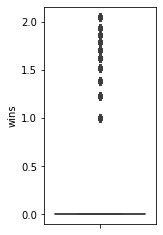

In [42]:
# #Working with outliers
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['wins']) #Normal as it is not easy to get wins in f1 therefore normal value for wins to be 0 with anything above 0 being an outlier

2.717361446466631

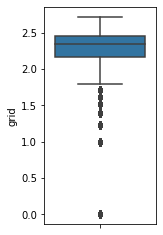

In [43]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['grid'])
data['grid'].max()

<AxesSubplot:ylabel='stop'>

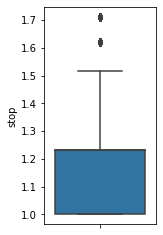

In [44]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['stop'])

<AxesSubplot:ylabel='driver_points'>

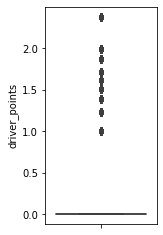

In [45]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['driver_points'])

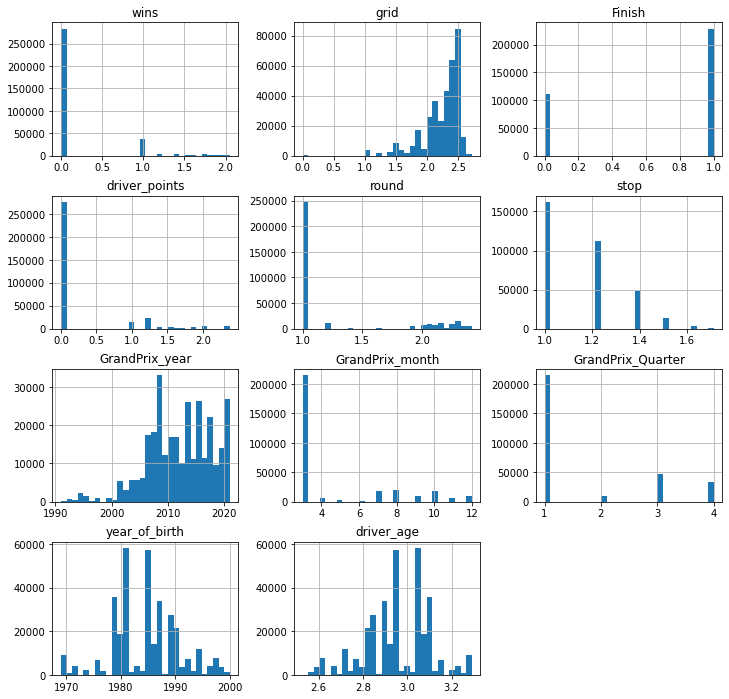

In [46]:
data.hist(bins=30, figsize=(12,12))
plt.show()
data_tf = data.copy()

In [47]:
# #Performing one hot encoding of top categories
vars_categorical = ['grandprix_name', 'constructor_name', 'constructor_nationality', 'driverRef','driver_nationality', 'code']

In [48]:
# #one hot encoding of top categories
ohe_enc = OneHotEncoder(
    
    # to indicate how many top categories
    top_categories=5,  
    
    # we can select which variables to encode
    variables= vars_categorical,
    
    # to indicate if we drop one of the binaries
    drop_last=False)
ohe_enc.fit(X_train)

OneHotEncoder(top_categories=5,
              variables=['grandprix_name', 'constructor_name',
                         'constructor_nationality', 'driverRef',
                         'driver_nationality', 'code'])

In [49]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

In [50]:
#Trying target mean encoding
# mean_enc = MeanEncoder(variables=None)
# mean_enc.fit(X_train, y_train)
# X_train = mean_enc.transform(X_train)
# X_test = mean_enc.transform(X_test)

In [51]:
# #Trying one hot encoding
# from feature_engine.encoding import OneHotEncoder

# ohe_enc = OneHotEncoder(
#     top_categories=None,
#     drop_last=True)

In [52]:
# ohe_enc.fit(X_train)
# ohe_enc.variables

In [53]:
# X_train = ohe_enc.transform(X_train)
# X_test = ohe_enc.transform(X_test)

In [54]:
X_train.head()
X_train.shape

(237485, 40)

In [55]:
#Doing equal frequency discretization(Chosen Method)
disc = EqualFrequencyDiscretiser(q=10, variables = ['round', 'wins'])


disc.fit(X_train)

EqualFrequencyDiscretiser(variables=['round', 'wins'])

In [56]:
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

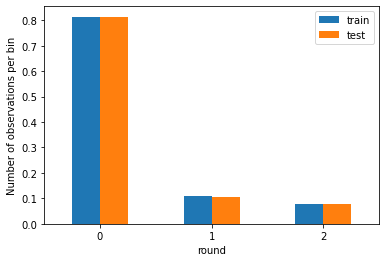

In [57]:
t1 = X_train.groupby(['round'])['round'].count() / len(X_train)
t2 = X_test.groupby(['round'])['round'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

In [58]:
# #Trying Equal Width Discretization
# disc = EqualWidthDiscretiser(bins=10, variables = ['round', 'wins'])

# disc.fit(X_train)

In [59]:
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [60]:
# t1 = X_train.groupby(['wins'])['wins'].count() / len(X_train)
# t2 = X_test.groupby(['wins'])['wins'].count() / len(X_test)

# tmp = pd.concat([t1, t2], axis=1)
# tmp.columns = ['train', 'test']
# tmp.plot.bar()
# plt.xticks(rotation=0)
# plt.ylabel('Number of observations per bin')

In [61]:
# #Performing min max scaling
# scaler = MinMaxScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(X_train)

# # transform train and test sets
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [62]:
# X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [63]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# # before scaling
# ax1.set_title('Before Scaling')
# sns.kdeplot(X_train['round'], ax=ax1, label ='round')
# sns.kdeplot(X_train['wins'], ax=ax1, label ='wins')
# ax1.legend()

# # after scaling
# ax2.set_title('After Scaling')
# sns.kdeplot(X_train['round'], ax=ax2, label ='round')
# sns.kdeplot(X_train['wins'], ax=ax2, label ='wins')
# ax2.legend()
# plt.show()

In [64]:
## Trying standardization
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler.mean_
scaler.scale_
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

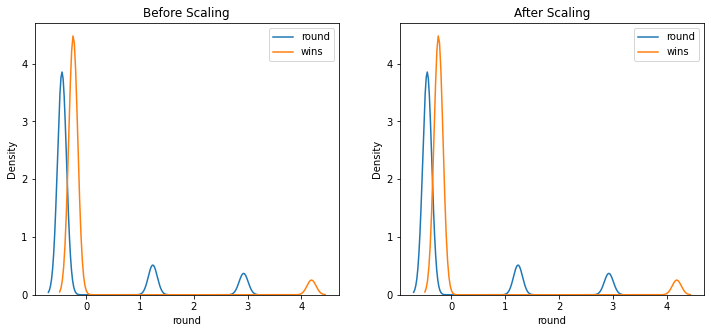

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['round'], ax=ax1, label ='round')
sns.kdeplot(X_train['wins'], ax=ax1, label ='wins')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train['round'], ax=ax2, label ='round')
sns.kdeplot(X_train['wins'], ax=ax2, label ='wins')
ax2.legend()
plt.show()

# Step 4: Machine Learning Model  <a id="part1.4"></a>

In [66]:
print(data.shape)
print(X_train.shape)
print(y_train.shape)

(339265, 17)
(237485, 40)
(237485,)


In [67]:
#Creating naive baseline model
import numpy as np
from scipy import stats

# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]
y_train_preds_naive = [int(modal_class_label) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]
y_test_preds_naive = [int(modal_class_label) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

ModeResult(mode=array([1], dtype=int64), count=array([160019]))


[1, 1, 1, 1, 1]

In [68]:
from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive
train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 67.38%.
The Naive Baseline Model's accuracy on test data is 67.14%.


In [69]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear') 
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [70]:
y_train_preds_logreg = logreg.predict(X_train)
y_test_preds_logreg = logreg.predict(X_test)
y_true = y_train
y_pred = y_train_preds_logreg

train_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on train data is {train_accuracy_logreg:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg

test_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on test data is {test_accuracy_logreg:.2f}%.")

The LogReg Model's accuracy on train data is 80.24%.
The LogReg Model's accuracy on test data is 80.14%.


## Report  <a id="part2"></a>

# Introduction with value based problem statement <a id="part2.1"></a>

My problem statement is Do independent variables such as driver or grandprix circuit affect then chances of a f1 driver being able to win the race  In F1, most drivers do finish the race except for a handful of drivers. There are many factors that will result in a driver not being able to finish a race. This may be due to the face that they are unlucky and are always running into issues. This might also be due to the fact that some drivers are not as skillful as others resulting in them colliding with other cars or spinning off the track due to inability to control the car hence not being able to finish the race. Whatever the factor that cause a f1 driver to not be able to finish the race, this dw assignment that Im trying to complete seeks out the independent variables that are capable of affecting the chances of a driver not being able to finish the race. 

# Problem Formulation <a id="part2.2"></a>

## Understanding the data <a id="part2.2.2"></a>

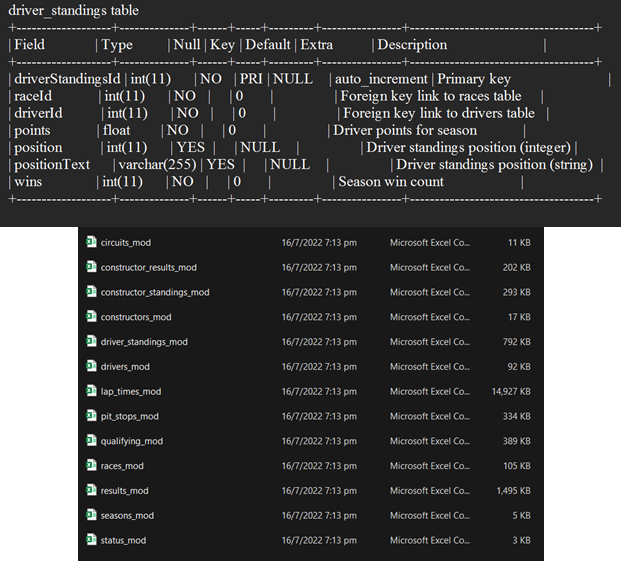
For assignment 2, we were given f1 data to perform predictions on. 13 files are being provided ranging from circuit information, driver information to lap times of the drivers. A f1 dictionary was also included in the form of a notepad that would allow us to understand the purpose of each of the columns in each table as well as the data type of the specific column. The first dataset that I was provided with was a circuits_mod dataset that contains the information of details of the different circuits including the circuit's latitude and longitude, location and country it is at. The second dataset that I was provided with is a constructor_results dataframe which contains the information of the different constructors with the number of points earned by the constructor during the season. The third dataset is a constructor_standings dataset which contains information of the position of the specific constructor during a specific season as well as the points it has earned. The fourth dataset is a constructors dataset which contains details of the different constructors such as their names and the primary key that was assigned to the constructor. The fifth dataset that is provided is the driver_standings dataset which contains the data of the driver standings as well as the points that are earned by each driver for that season. The sixth dataset is a drivers dataset that contains data about all the drivers in f1. The laptimes dataset contains data of the lap times of all the laps and of all the drivers.The pitstops dataset is a dataset that contains data of the pitstops taken by all the drivers. The qualifying dataset shows the qualifying times of all the drivers for the different races. The races dataset portrays the name of grand prixs. (Elaborate more on results seasons and status datasets.

## Load And Explore the data <a id="part2.2.1"></a>

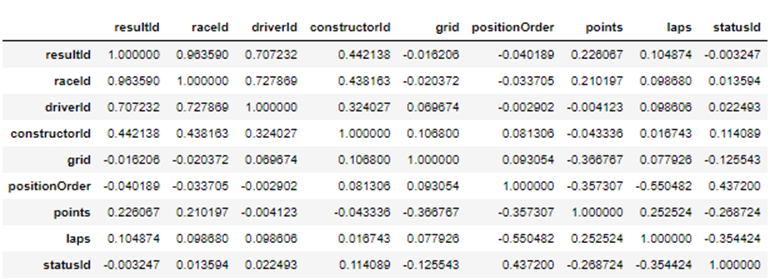
In order to explore the data, I decided to plot a correlation matrix for every dataframe to see if there are any correlation between different variables in each dataframe. We can see from the above screenshot that the screenshot is for the results dataframe. From the correlation matrix created for the results dataframe, we can see that status is related to position order with a correlation of 0.43 representing a moderate linear relationship. This makes sense to me as status is the damage or penalty taken by the car which will in turn affect the position order of the car. 

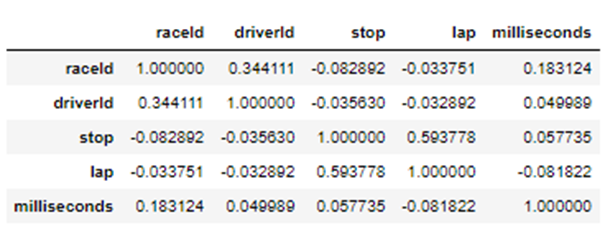
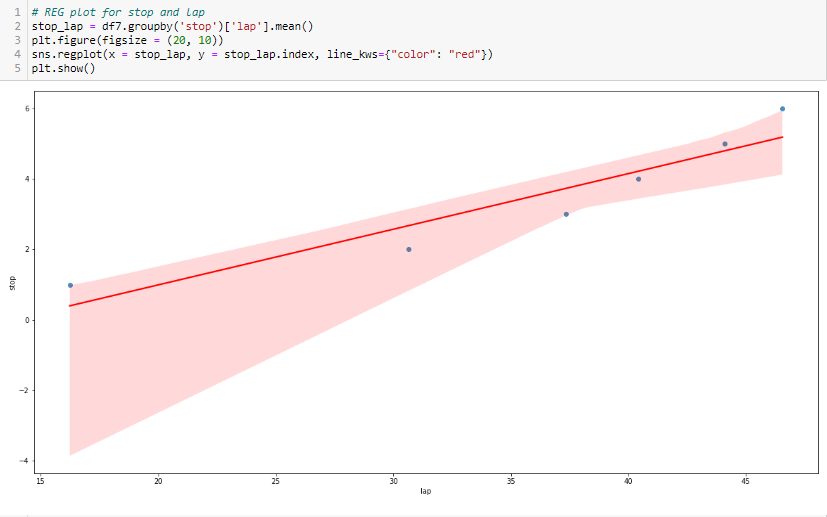
The above correlation matrix is for the pit stops dataframe and we can see that stops variable is related to laps as seen from the correlation matrix as these two variables have a correlation of 0.59 which shows a strong relationship between the two variables. This makes sense to me as with more laps taken by a car, the tyres of the car will tend to get warn down faster and hence more pitstops would be needed. I also plotted a regression plot to see the what is the trend of pitstops against laps

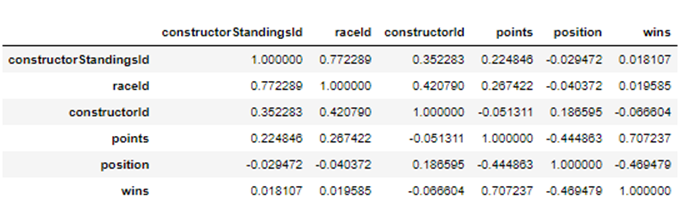
The above image is the correlation matrix for constructor standings. We can see from the correlation matrix that there is a relationship between points and position. There is a negative correlation coefficient of 0.44 between points and position and this makes sense to me as based on my understanding, the higher the points earned the lower the position of the driver or the constructor.

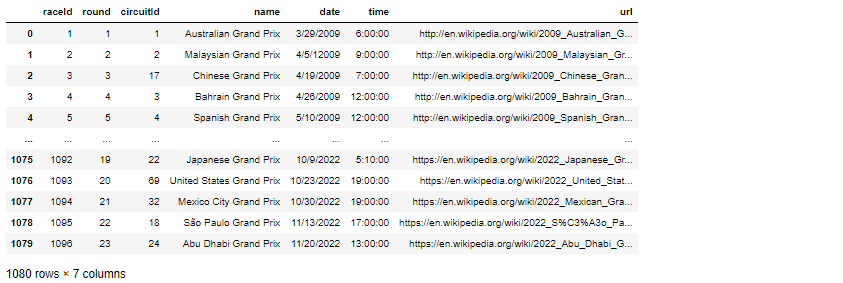
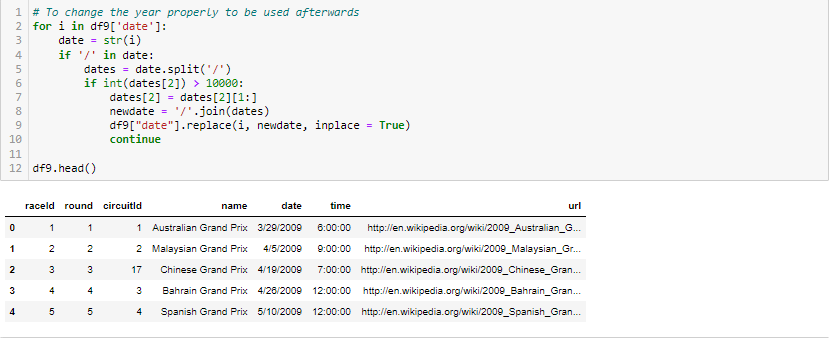

Before merging the tables, I actually analyzed each dataframe to see if there are any data that does not seem normal. After checking through, I realised that one of the datasets called races dataset actually had miswritten years. As you can see from the screenshot, in the date column in row 2, the year is written as 12009 instead of 2009 and after checking through the dataframe, there are a few rows that has the same problem. Therefore, I created a for loop to loop through the dataframe to check and replace year values that are miswritten so that it would not cause problems for me afterwards.

## Formulate a prediction problem <a id="part2.2.3"></a>

The prediction problem that I had formulated is that for every driver that is racing, who are able and unable to finish a race?

# Data Wrangling on multiple tables <a id="part2.3"></a>

## Extract and Create features from different tables <a id="part2.3.1"></a>

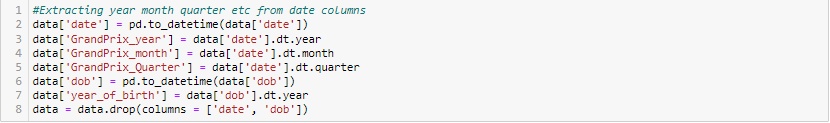

I decided to extract the year month and quarter values from the date column as well as the year from the date of birth of drivers column from the races dataframe. Since races occur seasonally, by extracting the year, month and quarter values, it might be very useful for the machine learning model as it has the ability to try to improve the accuracy of the model. Afterwards, I dropped the date columns as I feel that it is no longer needed since I have already extracted year month and quarter from the date columns. 

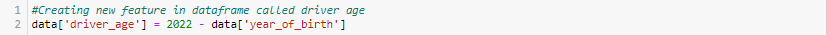

I created a new feature called driver_age. How I created this new feature was by using the previously extracted year from the date of birth column. I created a new column in the dataframe and renamed it as driver_age. In order to obtain the driver age, I used the current year subtracted by the year of the date of birth column to obtain the driver age.

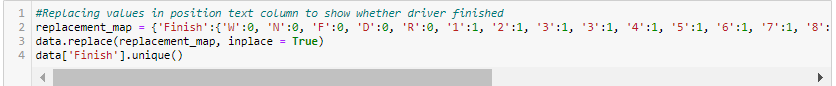

For my target variable, I used the feature of position text from the dataframe. Since my prediction problem was to predict who would be able to finish the race, I created a replacement map to replace all the values that are in position text to binary numbers. For those that did not finish the race in the position text, they would be marked by either 'W', 'N', 'F', 'D' or 'R'. These letters indicate that a driver did not finish the race while drivers who finished the race would be marked by a number which was represented by their position when they finish the race. Therefore by using the replacement map, I created a new feature called Finish. 0 would represent that the driver did not finish the race while 1 would represent that a driver would finish the race. This would be my target column later on for my train test split. 

## Concatenate, Merge or Join the tables <a id="part2.3.2"></a>

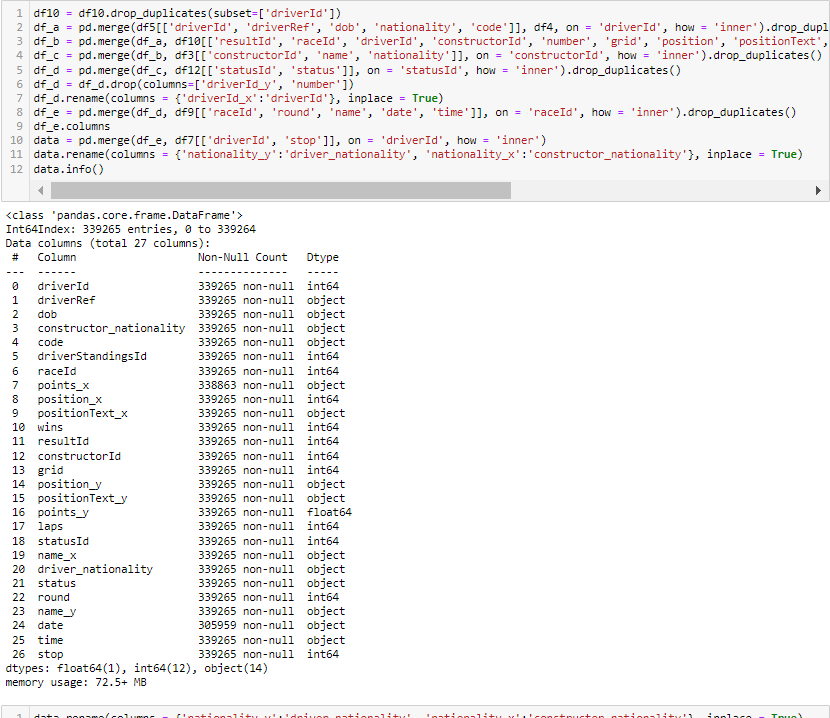

For the merging of tables, I decided to use 7 dataframes for my prediction. As seen from the screenshot above, the first two dataframes that I merged together was the drivers dataframe and the driver standings dataframe. The reason why I merged these two dataframe is because these two dataframe would be able to provide me with valuable information in telling me whether the drivers would finish a race. Some drivers tend to be more careless than others, causing them to not finish the race frequently and in this case, since we are provided with details of drivers and their standings, It would definitely help me in predicting whether a driver would be able to finish a race. The next dataframe that I decided to merge is the results dataframe. The results dataframe contains many information such as a drivers position after a race, the grid position in which the driver will be starting at and etc. From this table I decided to use some columns that would be useful in the prediction of whether a driver would be able to finish a race however, since this dataframe is related to the target variable that I am trying to predict, it would be risky to use variables that are available on post race such as laps as it provides insight to the model on whether the driver had finished the race. The next dataframe that I decided to merge is the constructors dataframe. This dataframe provides information of the different constructors in f1 which would be useful as different constructors manufacture cars of different standards, some are easier to handle than others and the ability of how good a driver can handle a car can also be a factor of predicting whether a driver is able to finish the race without any incidents. Subsequently, the next dataframe that I decided to merge is the status dataframe that defines what all the numbers mean. Afterwards, I merged the races dataframe. The races dataframe provides information of the names of the specific grand prix matched up with the unique primary key of each race as well as also providing information of the date and time of each specific race. The last dataframe that I chose to merge is a dataframe on the pitstops. This dataframe provides information of all the pitstops taking by the car as well as well as the lap at which the driver decides to do a pit stop. This would provide valuable information about the status of the car as a pit stop shortly into the race would indicate a problem with the car and therefore would affect the model on its predictions on whether a driver would be able to finish a race. At the end of merging all the tables, I realised that the number of rows of data has increased too much to a point whereby it takes quite a long time to run the merging of tables cell. Therefore to tackle this problem, I decided to look at which part causes the rows of data to increase drastically and realised that is it the results dataframe that caused the rows of dataframe to increase drastically. In order to tackle this problem, I used the drop duplicates function with the subset of results dataframe being the driverId and from there this code would consider driverId for duplicates and remove them so that the rows of data would not increase exponentially after merging.

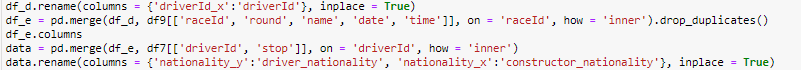
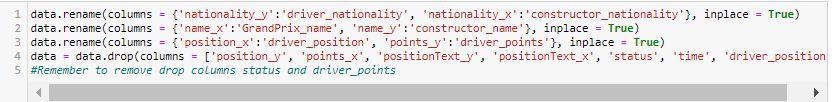

After merging the tables, I realised that there are some columns that have suffixes X and Y behind them and realised that was because after merging the dataframes, there are columns that are of the same name and therefore to differentiate between these columns, python has automatically added the suffixes X and Y behind them so that they can be differentiated by us. We can see that there are columns such as nationality that has X and Y being added behind them when they are actually representing different things. Therefore, I decided to manually rename every column that has a suffix behind so that I would be able to understand what I am doing later on. For example, the column of nationality actually represents two different things, one was representing driver nationality while the other was representing constructor nationality. Therefore, its important to rename columns that has suffixes to make it clearer for me. 

After doing everything and testing my data out with the naive baseline model, I realised that there are some variables that are very highly correlated with the the target variable such as driver position which therefore caused the model to show a 100 percent accuracy. I therefore decided to drop variables such as driver_position and etc so that the model predictions would not be biased just cause of variables like driver_position. I also dropped variables that contain Id behind them such as raceId etc as I think that they are not required.

# Data Cleansing And Transformation <a id="part2.4"></a>

## Missing Value And Outliers <a id="part2.4.1"></a>

### Outliers

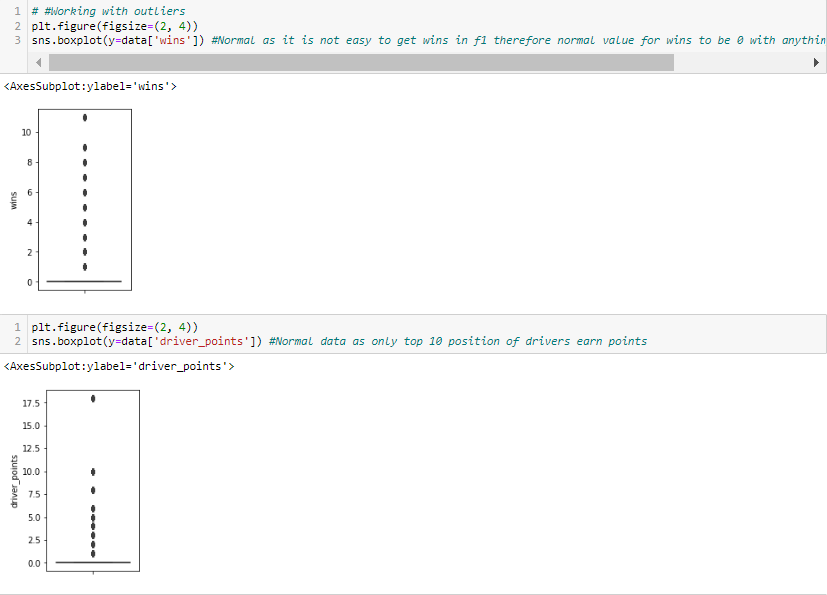

To find out what numerical variables have outliers, I decided to plot box plots for most of the numerical variables. We can see from the above images that these are the few numerical variable that has outliers. Starting from the first box plot that I had plotted for the wins variable, We can see from the box plot that there are many outliers for the wins variable. However, based on my personal knowledge this is perfectly normal as wins can hardly be racked up by f1 drivers, therefore it is not surprising to see that there are a number of outliers for the wins variable and therefore since this outliers are normal, they could provide valuable insight into the data and should not be removed. The second boxplot that seems to show outliers is the driver_points box plot as we can see has many outliers ranging from 1 all the way to 17.5. This is normal as only the top 10 drivers from a grand prix will be able to earn driver points therefore there will be outliers in the data as only top 10 driver position driver earn points. Hence, there will not be a need to remove these outliers as they look normal to me and by not removing them could be valuable for the model.

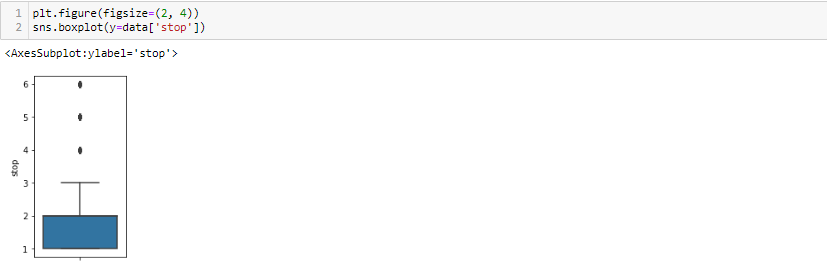

The last variable that contains outliers is the stop variable. The stop variable is a variable that determines the number of pitstops taken by a specific driver. We can see that the outliers are at stop 4, 5 and 6 respectively. For me however, based on my personal knowledge, in f1 there is no minimum number of pitstops to take by a driver. If a driver were to find problems with the car, they can request to pit stop of their own free will and therefore this outliers seems perfectly normal to me and I feel that these outliers need not to be removed.

### Missing data

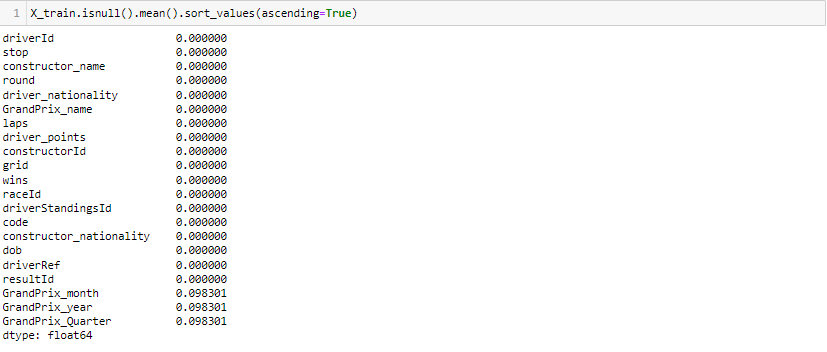

To find out what is the missing data, I decided to use the function .isnull().sum() to find out for all the variables in the dataset, which are the variables that are the ones containing the missing values. From the above screenshot, We can see that the variable that has missing values is the extracted date values with 9 percent of its values missing while the rest of the variables do not seem to have any missing values.

#### Mean Median imputation

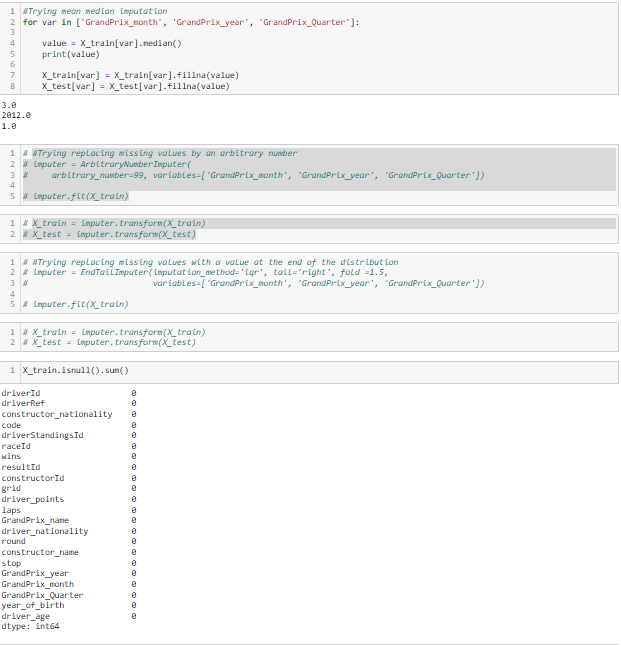

One of the method that I used to replace the missing values in the extracted date variable is the mean median imputation. Mean median consists of replacing missing values with the variable mean or median. The mean and median is being calculated in train sets and then used to impute into the train and test data. We can see that after the mean and median imputation is performed, the missing values are being replaced as shown from the .isnull().sum() function that there are no more missing values. In the end, I didnt choose this method as after comparing this method against the replacing missing values by an arbitrary number, the replacing missing values by an arbitrary number performed better accuracy wise on my machine learning model.

#### Replacing missing values by an arbitrary number

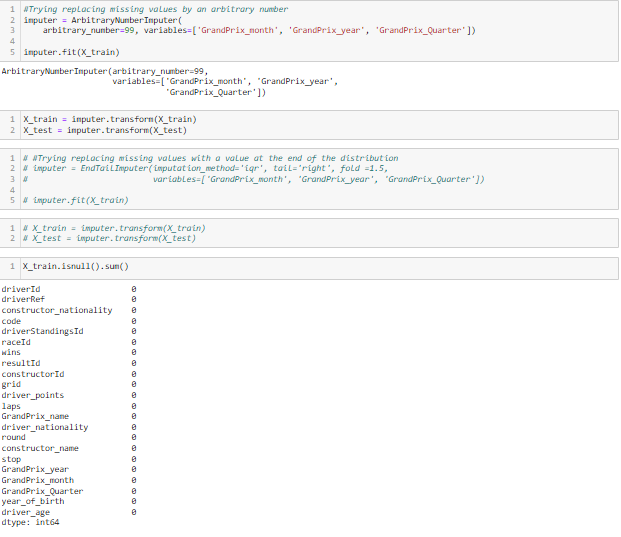

Another method that I tried to use to replace the missing value in the extracted date columns is the replacing missing value by an arbitrary number. This method consists of replacing the missing values with an arbitrary value. Some of these arbitrary values include 99, 999, or -1 for positive distributions and this method can only be used for numerical variables. After using this method, we can see that the missing values in the extracted date columns has all been replaced as shown by the 0 null values after using the .isnull().sum() function. I decided to choose this method over the mean median imputation method because this method performs better with my machine learning model than the mean median imputation method. 

#### Replacing missing values with a value at the end of the distribution

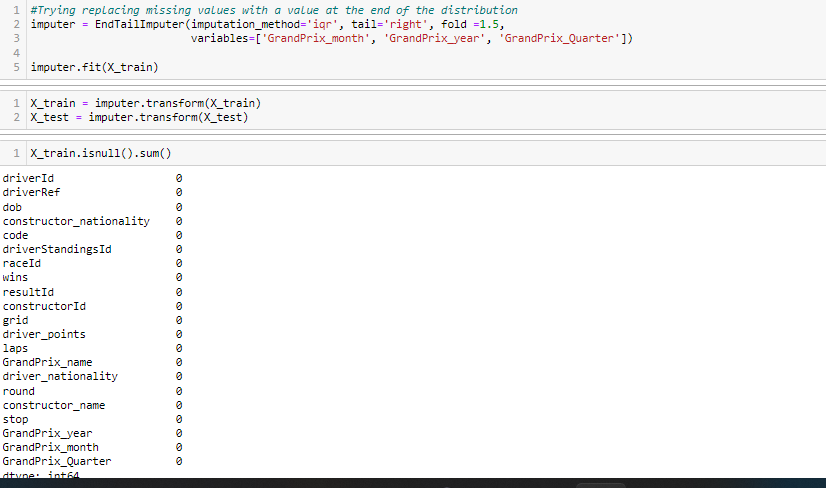

The last method that I tried to use was to replace missing values with a value at the end of the distribution. This method works similar to the replacing values with an arbitrary number but instead of identifying the values automatically, these values are automatically selected as those at the very end of the variable distribution. We can see from the screenshot that after using the method of replacing missing values with a value at the end of the distribution, all the null values in the extracted date columns has been replaced. However, I did not choose this method as the method of replacing missing values by an arbitrary number performed better with my machine learning model than this method.

### Encoding Categorical Data <a id="part2.4.2"></a>

#### One hot encoding

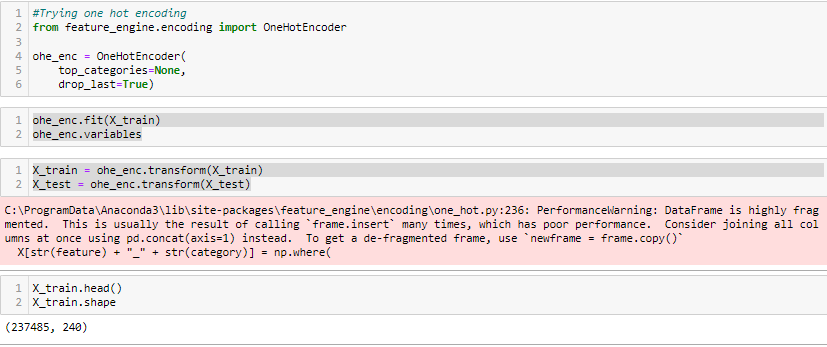

One of the first methods that I tried was the normal method of one hot encoding. One hot encoding is a method whereby we represent a categorical variable as a group of binary variables where each binary variable represents one category. However, One hot encoding has its flaws. The dataset that we were provided with contains lots of categorical columns with each categorical column containing lots of unique values. This causes one hot encoding to increase the dimensionality of the dataframe drastically as seen from the X_train.shape function which shows 240 columns. Another flaw is that it produces multicollinearity among the various variables, lowering the model's accuracy and hence I did not choose this method of encoding categorical data.

#### One hot encoding of top categorical variables

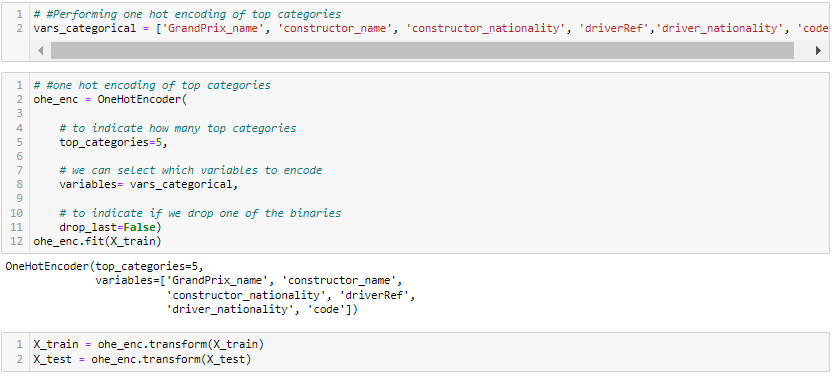

The chosen method that I decided to use to encode my categorical variables is the method of one hot encoding of the top categorical variables. One hot encoding of top categories represents each category of a categorical variable with a binary variable. I chose this method over the original method of one hot encoding as this method of one hot encoding will not increase the dimensionality of the dataset drastically as one hot encoding of top categories only performs one hot encoding of the most frequent categories only. With a high dimensionality dataset, we may run the risk of overfitting the model, which will result in terrible out of sample performance. Therefore, I decided to use one hot encoding of top categorical variables instead of the normal way of one hot encoding.

#### Target Mean Encoding

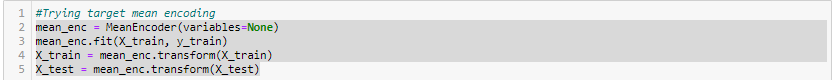

Target mean encoding consists of replacing the categories with the average target value for that category. However, I did not choose this method as this method does not work well with my machine learning model as compared to the one hot encoding of top categorical variables. 

### Transforming Numerical Data <a id="part2.4.3"></a>

#### Yeo Johnson Transformation

Before transformation:

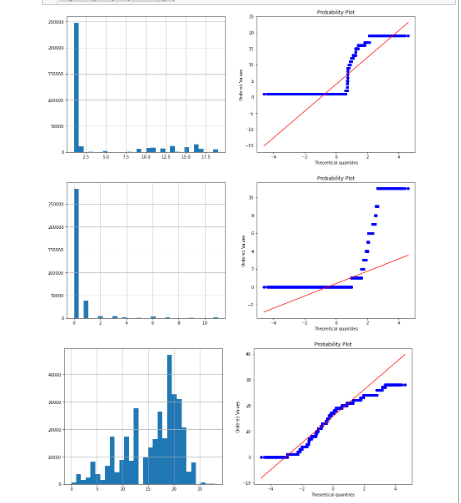
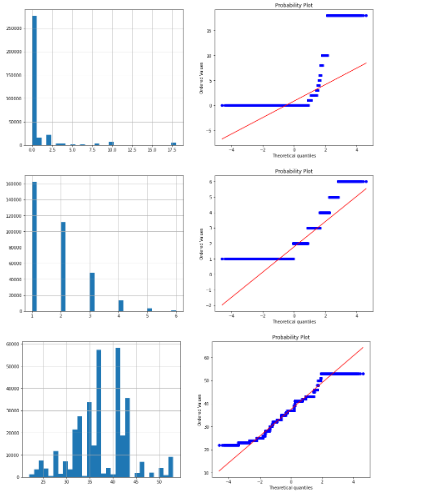

After Transformation:

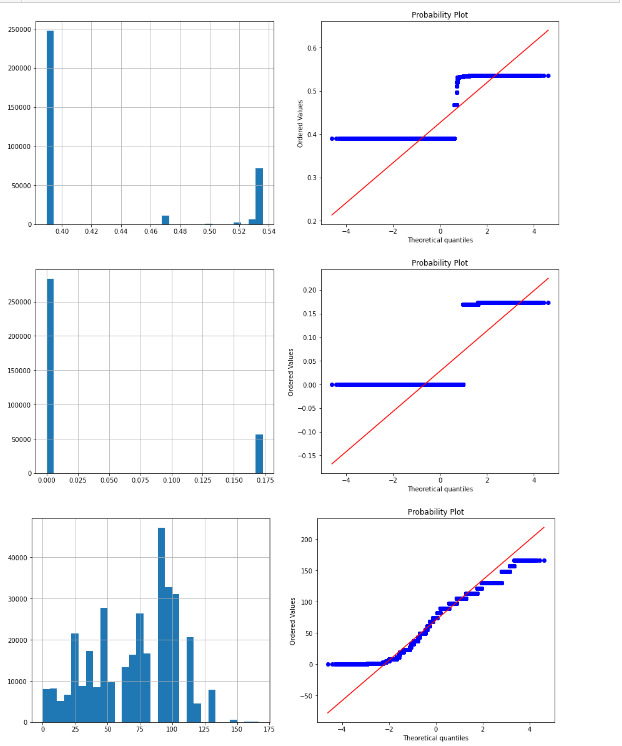
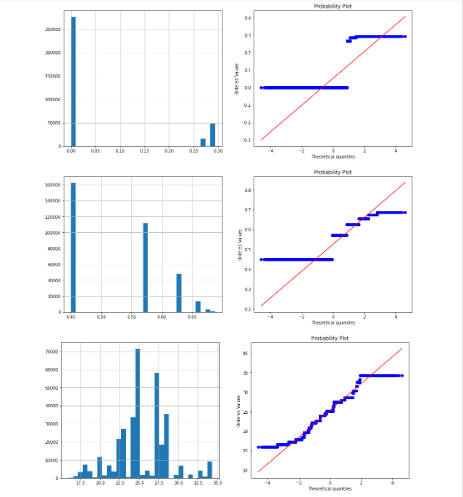

Yeo Johnson Transformation is an extension of the box cox transformation and can be used on variables with zero and negative values, as well as positive values. We can see from the above screenshots that there may not seem to be a huge difference in the distribution of the two variables after transformation. However, looking at the histogram for the driver_age variable, we can see that yeo johnson transoformation has made the variable more normally distributed. In the end, after comparing model performance between the two numerical methods that I tried, I did not use Yeo Johnson Method as it did not perform as well model wise as compared to the power transformation method.

### Power Transformation

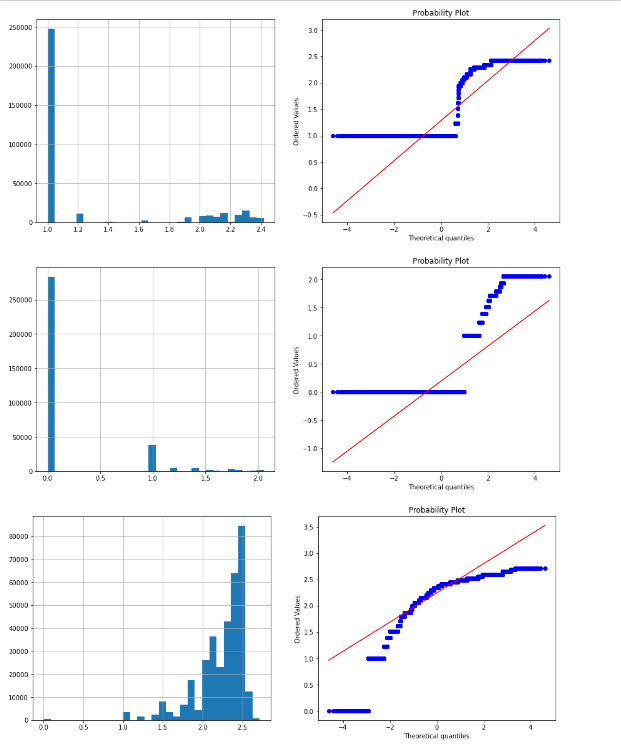
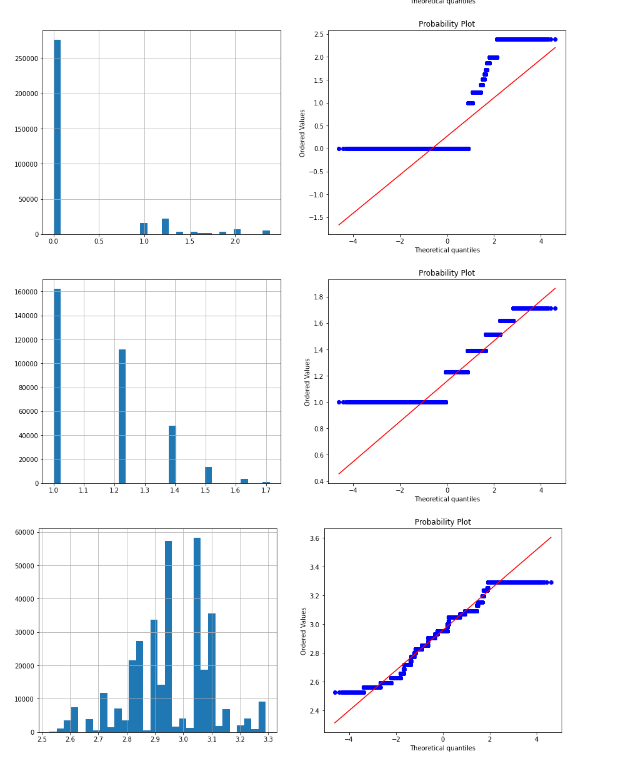

Another method of numerical transformation that I tried and I chose is the power transformation method. Power transformation is a method of numerical transformation to make the data look more 'Gaussian-like'. This method of transformation is useful for modelling issues related to non constance variance, or other issues when normality is desired. We can see that this power transformation has indeed tried to make the data more normally distributed. We can see from the variable such as driver_age histogram that it is indeed more normally distributed than before the transformation. Hence since both of the numerical transformation methods, yeo johnson transformation and power transformation has achieved its purpose of making numerical variables more normally distributed, I decided to choose the method that produces the best model performance and in this case, the numerical transformation method that produced the best model performance is the power transformation method. 

### Box Cox Transformation

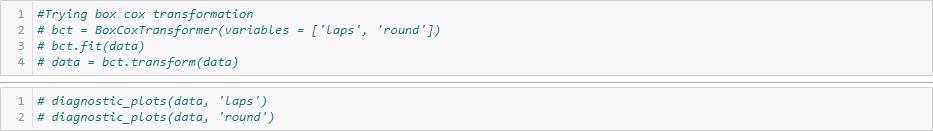

The last method of numerical transformation that I tried is the box cox transformation. Box cox transformation is whereby several values of lambda are considered and the lambda that returns the best transformation is selected. However, box cox transformation is not as flexible as the previous two transformations that I did. A box cox transformation requires the values of the numerical variable that is being inputted to be a positive value otherwise it would not work and therefore, I did not choose the Box Cox transformation method.

### Variable Discretization <a id="part2.4.4"></a>

#### Equal Frequency Discretization

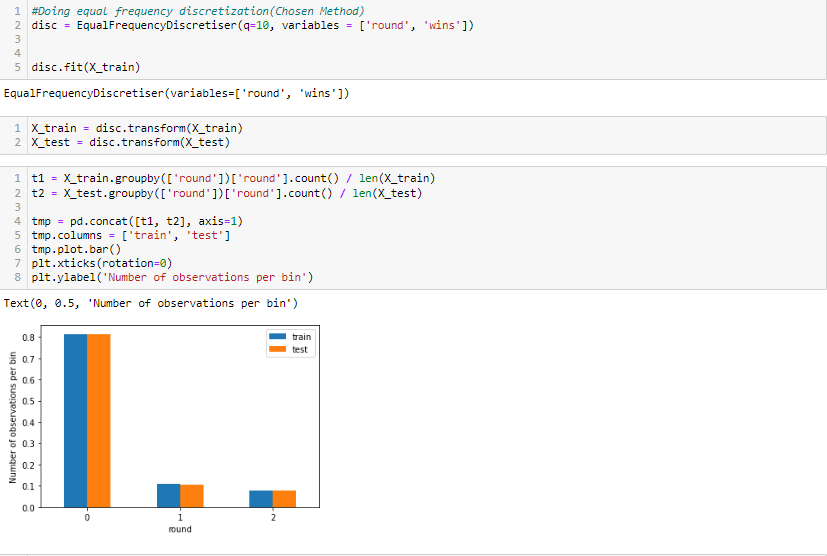

One of the methods that I tried for variable discretization is the method of equal frequency discretization. Equal frequency divides the values of variables into intervals that carry the same proportion of observations. The interval width is determined by quantiles, and therefore different intervals may have different widths. This method is particularly useful for skewed data as it spreads the observations over the different bins more equally. We can see from the grouped bar chart that is plotted above that for the round variable for example, we can see that equal frequency is trying to make the bin heights about the same through the number of observations per bin however the width of each bin is definitely not equal. This is my chosen method of variable discretization as I can see that most of the bins have nearly the same number of observations as well as this method works much better than equal width discretization on my machine learning model.

#### Equal Width Discretization

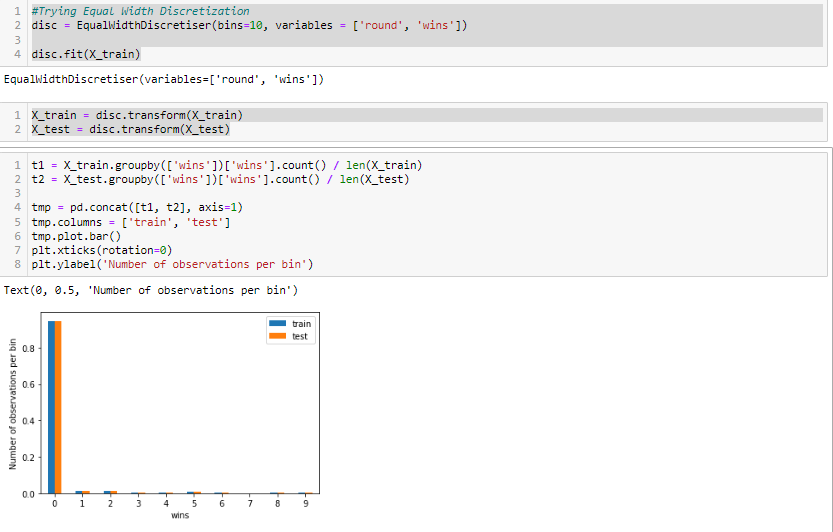

Another method that I tried for variable discretization is the method of equal width discretization. For equal width discretization, the variable values are sorted into intervals of same width. The number of intervals is decided arbitrarily and the width is determined by the range of values of the variable and the number of bins to create. We can see from the grouped bar chart that for equal width discretization, the number of observations for each bin are definitely not the same height, however, the width of each bin is in turn the similar to each other. However, I did not choose this method of variable discretization as it does not seem as effective in what it is trying to achieve as compared to equal frequency discretization as well as it does not seem to perform as well as equal frequency discretization on my machine learning model.

### Feature Scaling <a id="part2.4.5"></a>

#### Standardization

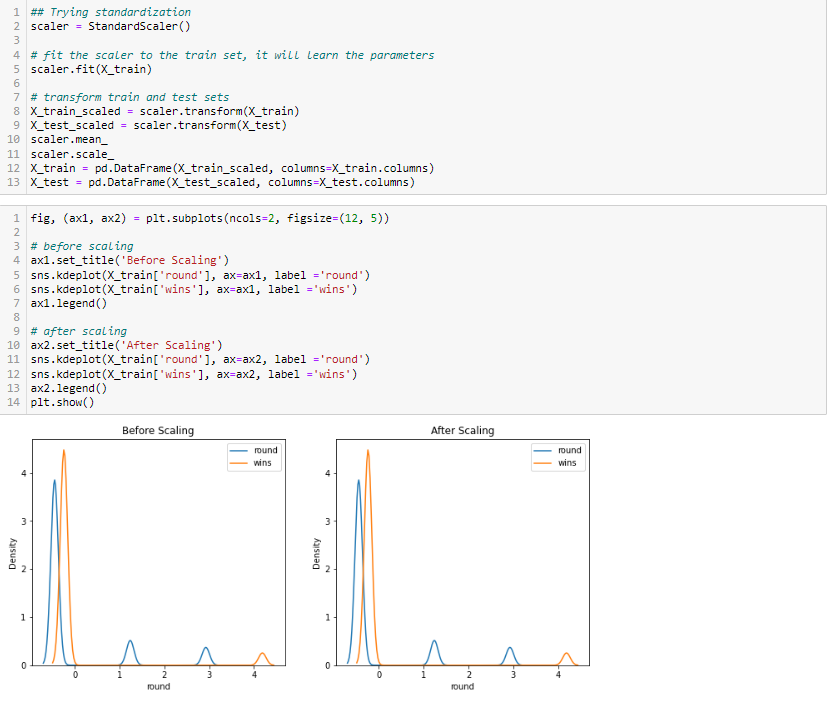

The first method that I tried was standardization. Standardization is the process of centering the variable at zero and standardizing the variance to 1. To standardize features, we subtract the mean from each observation and then divide the result by the standard deviation. We can see from the chart that not much has changed even after standardization has been applied. However, feature scaling is important to a machine learning model as it can significantly boost a model's performance. It also helps to stabalize the accuracy of the model. Therefore to know which feature scaling method to use, I compare the methods against the machine learning model accuracy to see which method produces the best accuracy in the machine learning model.

#### Min Max Scaling

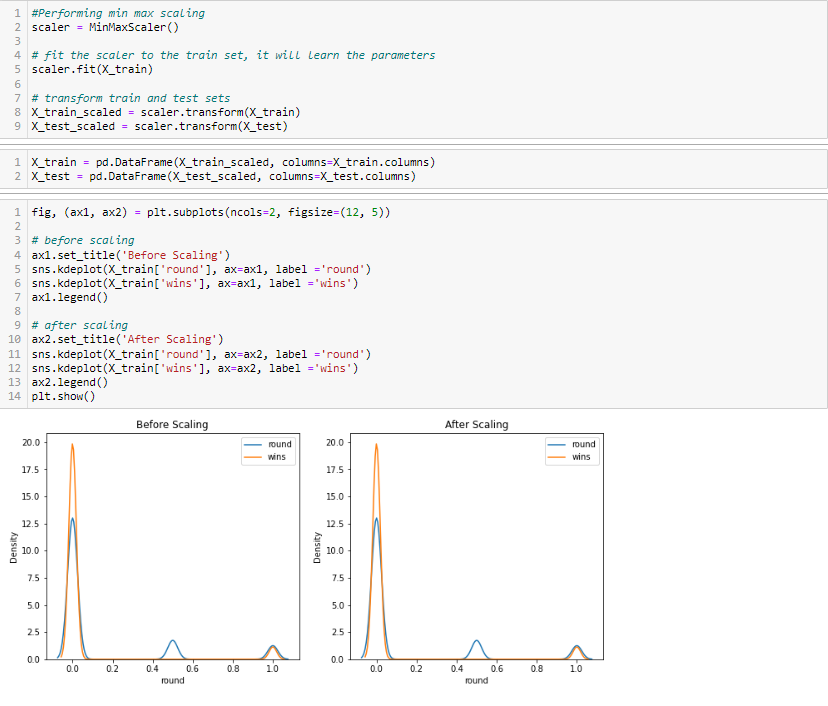

The second method that I tried was min max scaling. Min Max Scaling involves squeezing the values of the variables beween 0 and 1. To implement this scaling method, we need to subtract the minimum value from all the observations and divide the results by the value range, that is the difference between the maximum and minimum values. We can see from the chart that min max scaling does not seem to affect the scaling of the variables at all. I also did not choose this method because feature scaling seems to have a better effect on the machine learning model accuracy than this method of min max scaling.

## Machine Learning Model <a id="part2.5"></a>

### Show count of rows and columns <a id="part2.5.1"></a>

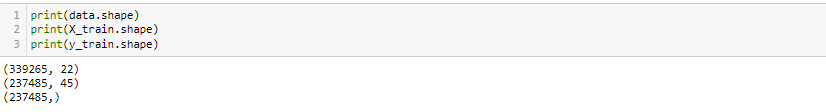

For this assignment, I used in total of 339265 rows of data for my predictions. I also separated my dataset using the X_train split into 70% train and 30 percent test. We can see from the X_train.shape that my training data contains about 237485 rows of data which means that my test data would contain about 101000 rows of data. 

### Build and evaluate the simple machine learning model against a naive baseline model <a id="part2.5.2"></a>

#### Naive Baseline Model:

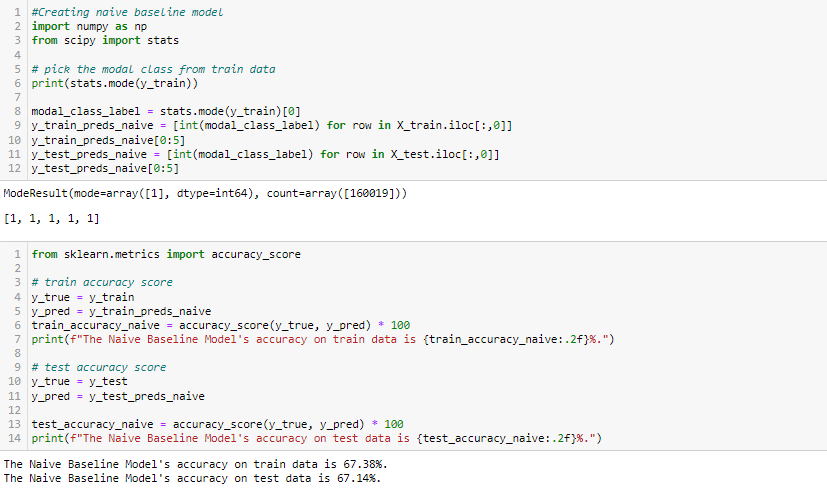

This is the naiive baseline model that I had created for my classification problem.  A baseline model is a method that uses heuristics, simple summary statistics, randomness or machine learning to create predictions for a dataset. These prediction accuracy will then be compared against other machine learning algorithms next such as the simple maching learning model of logistic regression that I am going to do next. As we can see from the naiive baseline model that is being created, the naive basline model predicted my target variable with an accuracy of 67.38 percent on the train data and 67.14 percent accuracy on the test data. My expectations for my simple machine learning model accuracy compared to this naiive baseline model is that it should be at least higher than the naive baseline model otherwise I would have to check on my previous steps to see if there are any steps that I had done wrongly. 

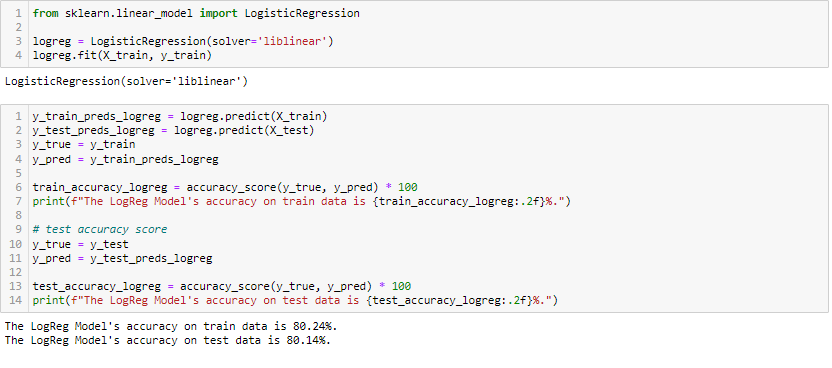

The method that I had chose to do the simple machine learning model on is the logistic regression model. A logistic regression model is a classification algorithm that is used to predict the probability of a categorical dependent variable. Logistic regression is somewhat similar to polynomial and linear regression and is relatively uncomplicated. The basis of logistic regression is the logistic function also known as the sigmoid function, which takes any real valued number and maps it to a value between 0 and 1. Logistic regression also takes a linear equation as input and use logistic functions and log odds to perform a binary classification task.  We can see from this logistic regression model that the model is being able to predict with 80 percent accuracy on my classification problem for both my train and test data. Additionally, the accuracy on train and test data is very similar which tells me that I did not overfit my data. A accuracy of 80% on a machine learning model is considered good and is realistic. For this machine learning model, the variable that I want to predict is the StatusId variable which is a dependent variable while most of the rest of the variable that I am using to predict the target variable is a independent variable. We can see that the model accuracy for train and test data is quite similar as previously mentioned however, the train data accuracy is every so slightly higher than the test data's accuracy. This is to be expected as the model is optimzed for train data instead of test data. Test data is data unseen by the model and train data is the data that is used to train the model itself. Therefore it would be weird if test data accuracy is higher than train data accuracy as it could mean underfitting of the data or even worse a potential data leakage case which would cause the model to be highly inaccurate and highly biased. Hence with my train data accuracy higher than my test data accuracy but only by a fair bit, it is safe to say that there is no overfitting or underfitting of the data. 

## Summary and Further Improvements <a id="part2.6"></a>

### Summary of my findings <a id="part2.6.1"></a>

After doing this assignment, there are some findings to be made. It is important to explore the data beforehand to gain an insight on what the data is about. For encoding categorical data, one hot encoding is the best for non ordinal variables however could increase the dimensionality of the dataset drastically and henceforth it is perhaps best to use one hot encoding of top categories to not increase dimensionality of dataset drastically. For numerical transformation, if both methods perform similarly and achieve what they are trying to achieve as well, we should look at the model performance to see which method performs better with the model and choose that method and same goes for variable discretization. Feature scaling should be done on the dataset as it helps to normalize the data of numerical variables within a certain range which makes it easier for machine learning algorithms and hence boost the performance of the machine learning model. There are many types of machine learning models however I chose the logreg model as it fits my problem the best and it is also a machine learning model for classification problems. For the accuracy of a machine learning model, an accuracy between 70 to 90 percent is desired. Any higher would be considered overfitting and a biased model while any lower would mean that the machine learning model still cannot predict the target variable as well. The accuracy on train data also has to be higher than test data as train data is the data that we are using to predict while test data is data that is unseen and therefore train should have a higher accuracy.

### Possible Improvements <a id="part2.6.2"></a>

For the merging of tables, I think that I could have possibly merged them in a more efficient way. After merging of tables, I should have immediately renamed my variable names so that what each column means are more clear to me as well as start analyzing the new dataframe of merged tables to find out if there are any columns that are highly correlated to the target variable so I can drop them otherwise, they could affect the accuracy of my machine learning model later on to created a biased model. Before the merging of tables, I could have studied the f1 dictionary that was provided a bit more in depth so that my knowledge of each column is better so that cleaning of outliers later would be easier as well. Subsequently, I feel that I could have created more features than what I had already created so as to help gain more insight of the data. 